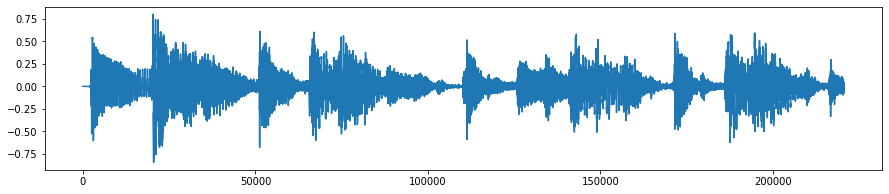

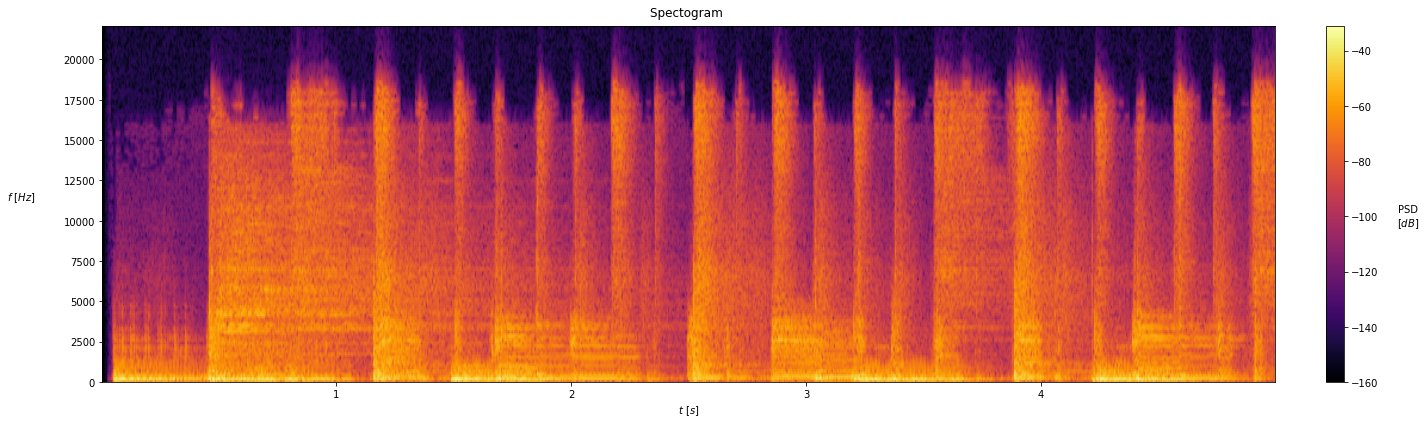

In [19]:
# filtering 1 
# thanks Petr Palka (BP 2021/22) for several functions and many ideas ! 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy.signal import spectrogram, lfilter, freqz, tf2zpk, ellipord, ellip
import soundfile as sf
from IPython.display import Audio
from IPython.display import display


def plot_spectrogram(f, t, sgr, name='', vmin=-160, ax=None):
    # Transfer to PSD 
    sgr_log = 10 * np.log10(sgr + 1e-20)  # log(0) is undefined -> +1e-20 (add small value)

    if ax == None:
        fig = plt.figure(figsize=(20, 6))
        ax = fig.add_subplot(111)
    
    name = f'[{name}]' if name else '' 
    ax.set_title("Spectogram " + name, pad=10)
    ax.set_xlabel('$t\ [s]$')
    ax.set_ylabel('$f\ [Hz]$', rotation=0, labelpad=42)
    ax.set_xlim(min(t), max(t))

    # pcolormesh of spectogram:
    cmesh = ax.pcolormesh(t, f, sgr_log, shading="gouraud", cmap=cm.inferno, vmin=vmin)
    cbar = plt.colorbar(cmesh, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label('PSD\n$[dB]$', rotation=0, labelpad=30)
    plt.tight_layout()

def plot_mag_freq_response(w, H):
    plt.figure(figsize=(10,3))
    plt.plot(w, np.abs(H))
    plt.gca().set_ylabel('$|H(f)|$')

    

# >>>>>>>>>>>>>>>>> #demo_lowpass <<<<<<<<<<<<<<<<<<<<<<<<<
s, Fs = sf.read('music.wav')    # stereo, select only 8 secs ... 
s = s[0:5*Fs]
display(Audio(s, rate=Fs))
plt.figure(figsize=(15,3))
plt.plot(s)
freq, time, sgr = spectrogram(s, Fs)
plot_spectrogram(freq, time, sgr)  


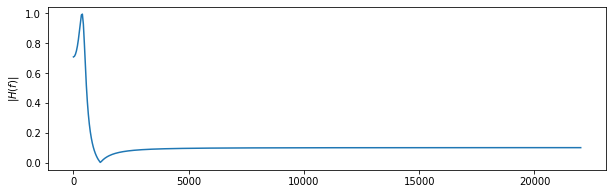

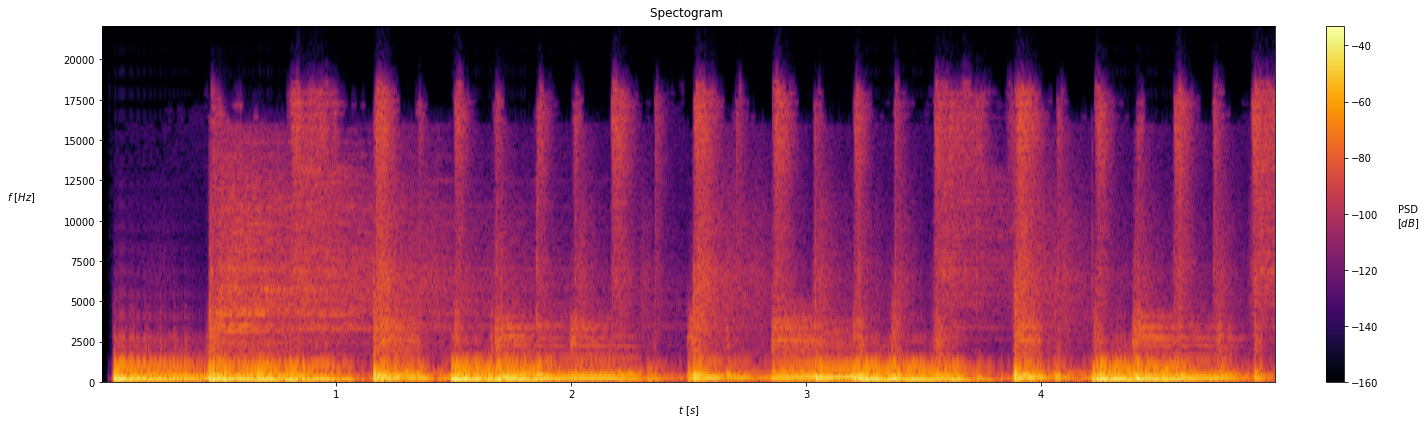

In [25]:
# design the filter and show its freq char ... 
Fs2 = Fs/2
Wp = 500/Fs2
Ws = 1000/Fs2
Rp =  3
Rs = 20; 
N,Wp = ellipord(Wp, Ws, Rp, Rs); 
B,A = ellip(N,Rp,Rs,Wp); 
w, H = freqz(B, A)
plot_mag_freq_response(w / np.pi * Fs2, H)

# filter the signal, show spectrogram and play it ... 
ss = lfilter (B,A,s)
display(Audio(ss, rate=Fs))
freq, time, sgr = spectrogram(ss, Fs)
plot_spectrogram(freq, time, sgr)  


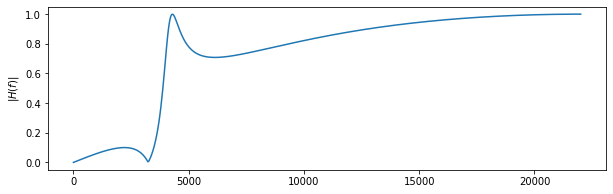

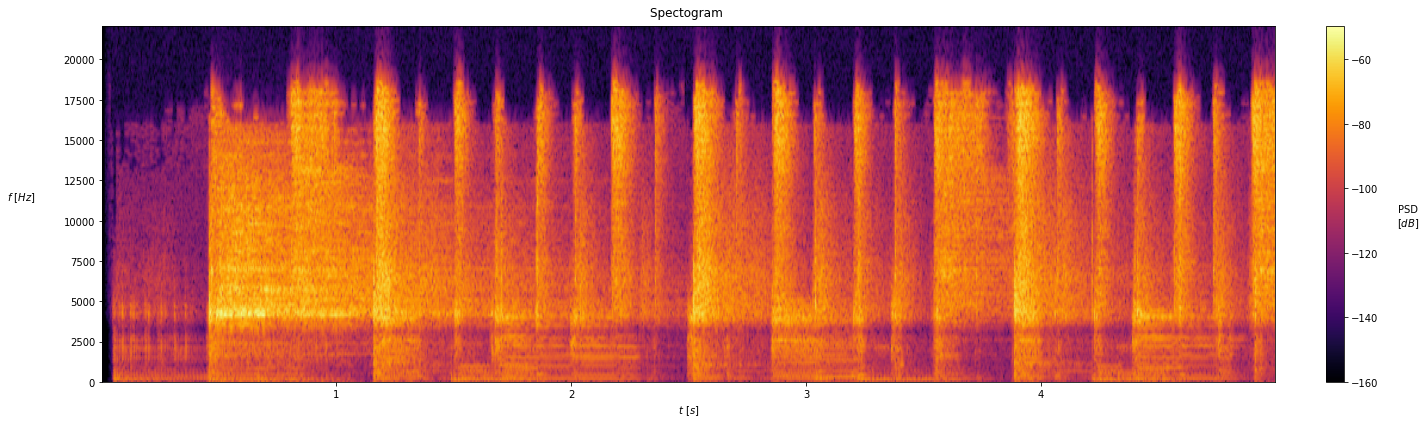

In [39]:
# >>>>>>>>>>>>>>>>> #demo_highpass <<<<<<<<<<<<<<<<<<<<<<<<<
Wp = 4000/Fs2
Ws = 5000/Fs2
Rp =  3
Rs = 20
[N,Wp] = ellipord(Wp, Ws, Rp, Rs); 
[B,A] = ellip(N,Rp,Rs,Wp,btype='highpass'); 
w, H = freqz(B, A)
plot_mag_freq_response(w / np.pi * Fs2, H)

# filter the signal, show spectrogram and play it ... 
ss = lfilter (B,A,s)
display(Audio(ss, rate=Fs))
freq, time, sgr = spectrogram(ss, Fs)
plot_spectrogram(freq, time, sgr)  


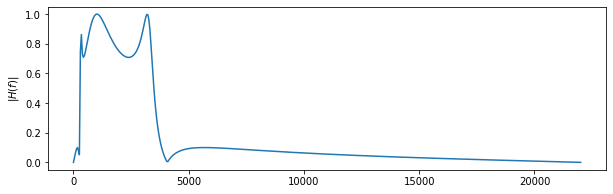

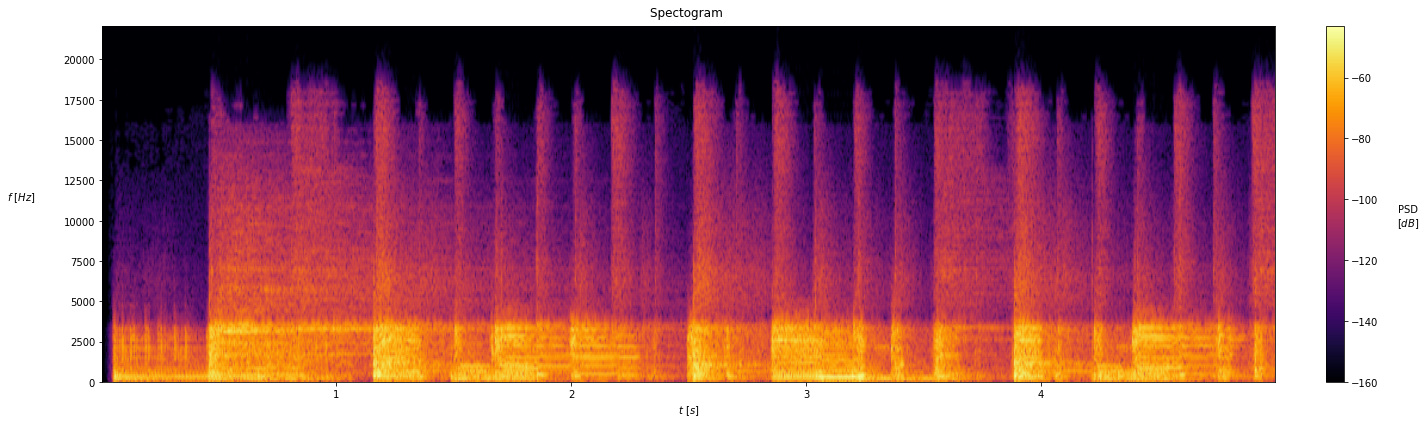

In [43]:
# >>>>>>>>>>>>>>>>> #demo_telephone <<<<<<<<<<<<<<<<<<<<<<<<<
Wp = [300/Fs2, 3400/Fs2]
Ws = [200/Fs2, 4000/Fs2]
Rp =  3
Rs = 20; 
N,Wn = ellipord(Wp, Ws, Rp, Rs); 
B,A = ellip(N,Rp,Rs,Wn,btype='bandpass'); 

w, H = freqz(B, A)
plot_mag_freq_response(w / np.pi * Fs2, H)

# filter the signal, show spectrogram and play it ... 
ss = lfilter (B,A,s)
display(Audio(ss, rate=Fs))
freq, time, sgr = spectrogram(ss, Fs)
plot_spectrogram(freq, time, sgr)  


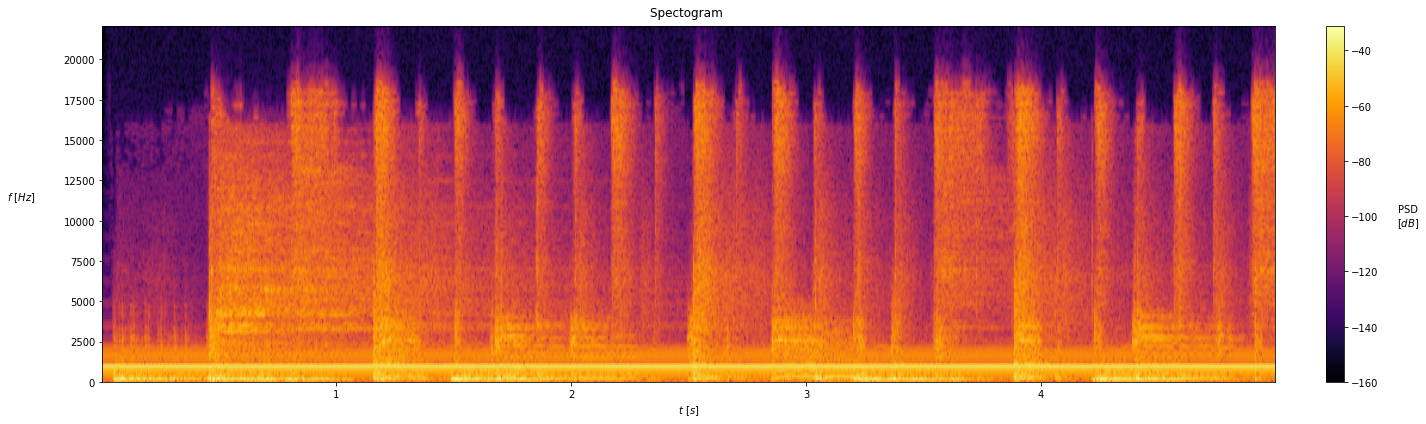

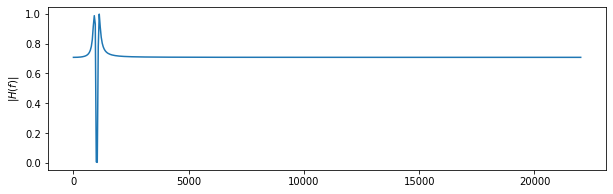

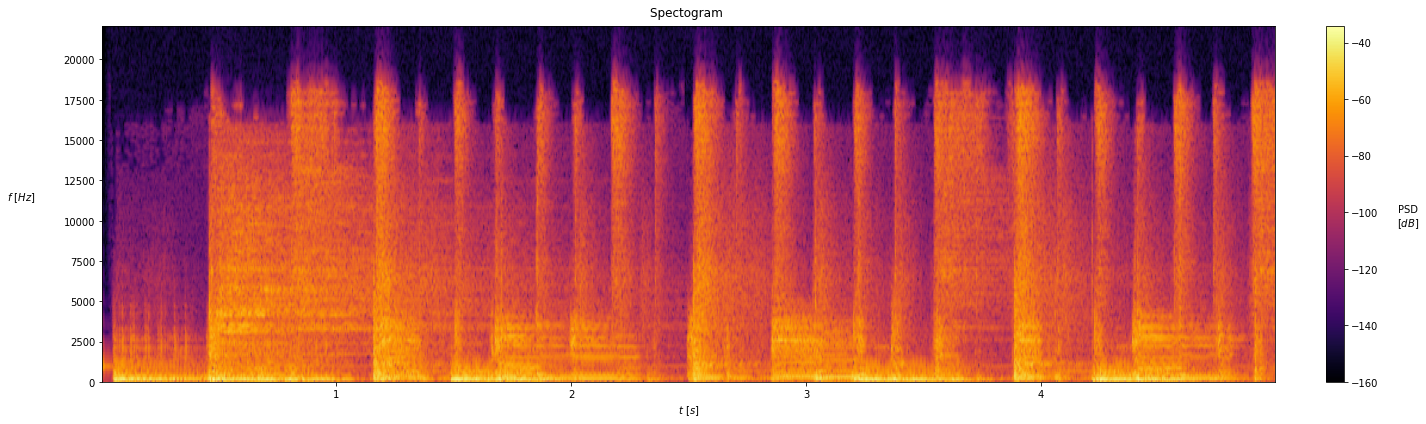

In [46]:
# >>>>>>>>>>>>>>>>> #demo_1kHz_cleaning <<<<<<<<<<<<<<<<<<<<<<<<<
n = np.arange(s.size) 
s1 = s + 0.2 * np.cos (2 * np.pi * 1000 / Fs * n); 
display(Audio(s1, rate=Fs))
freq, time, sgr = spectrogram(s1, Fs)
plot_spectrogram(freq, time, sgr)  

# design band-stop around 1k ...
Wp = [950/Fs2, 1050/Fs2]
Ws = [975/Fs2, 1025/Fs2]
Rp =  3
Rs = 40; 

N,Wn = ellipord(Wp, Ws, Rp, Rs); 
B,A = ellip(N,Rp,Rs,Wn,btype='bandstop'); 

w, H = freqz(B, A)
plot_mag_freq_response(w / np.pi * Fs2, H)

ss = lfilter (B,A,s1)
display(Audio(ss, rate=Fs))
freq, time, sgr = spectrogram(ss, Fs)
plot_spectrogram(freq, time, sgr)  

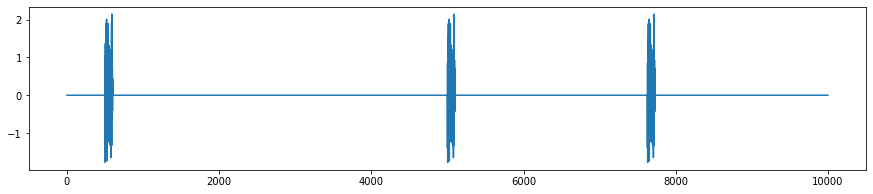

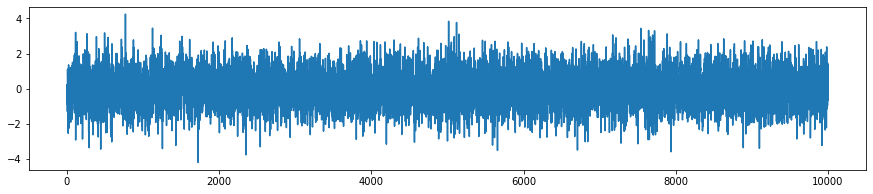

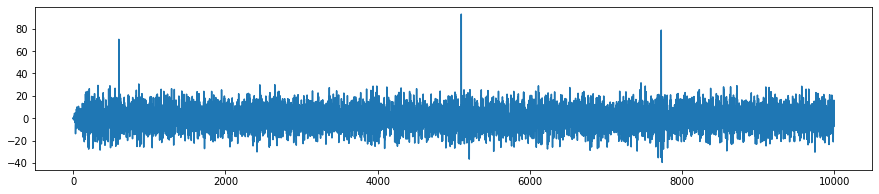

In [60]:
# >>>>>>>>>>>>>>>>> #demo_matched_filter <<<<<<<<<<<<<<<<<<<<<<<<<
n = np.arange(10000)
LEN = 100
positions=[500, 5000, 7628]
emitted = 1 * np.random.randn(LEN)

# clean  
clean = np.zeros(n.shape)
for position in positions:
    clean[position:position+LEN] = emitted
plt.figure(figsize=(15,3))
plt.plot(clean)

# noisy 
noisy = clean + np.random.randn(clean.size)
plt.figure(figsize=(15,3))
plt.plot(noisy)

# matched filter and result 
detected = lfilter (np.flip(emitted),1,noisy)
plt.figure(figsize=(15,3))
plt.plot(detected)

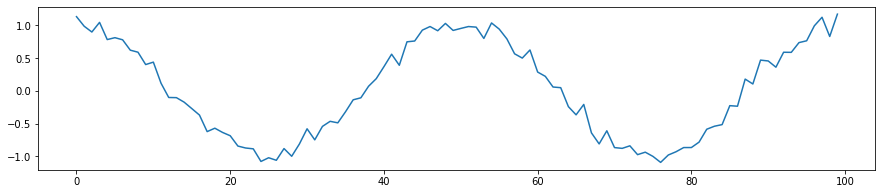

<Figure size 1080x216 with 0 Axes>

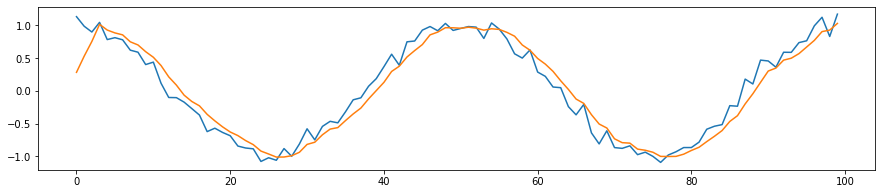

In [72]:
# >>>>>>>>>>>>>>>>> #filter1 <<<<<<<<<<<<<<<<<<<<<<<<<
# first some test signal
N = 100
n = np.arange(N)
x = np.cos(2 * np.pi * 2 * n / N) + 0.1 * np.random.randn(N)
plt.figure(figsize=(15,3))
plt.plot(x)

B = [0.25, 0.25, 0.25, 0.25]
y = lfilter(B,1,x)
plt.figure(figsize=(15,3))
plt.figure(figsize=(15,3))
plt.plot(x)
plt.plot(y)


<Figure size 1080x216 with 0 Axes>

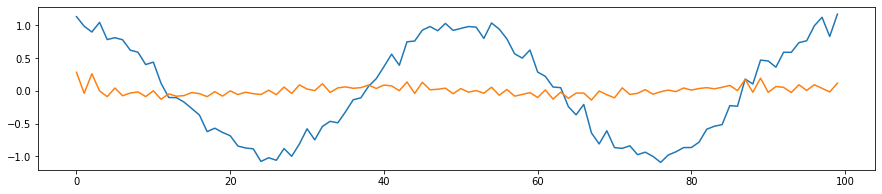

In [73]:
# >>>>>>>>>>>>>>>>> #filter2 <<<<<<<<<<<<<<<<<<<<<<<<<
B = [0.25, -0.25, 0.25, -0.25]
y = lfilter(B,1,x)
plt.figure(figsize=(15,3))
plt.figure(figsize=(15,3))
plt.plot(x)
plt.plot(y)


<Figure size 1080x216 with 0 Axes>

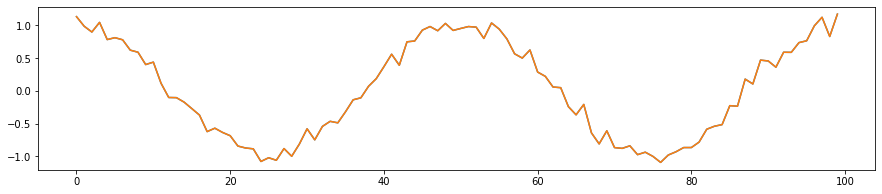

In [75]:
# >>>>>>>>>>>>>>>>> #filter3 <<<<<<<<<<<<<<<<<<<<<<<<<
B = [1, 0, 0, 0]
y = lfilter(B,1,x)
plt.figure(figsize=(15,3))
plt.figure(figsize=(15,3))
plt.plot(x)
plt.plot(y)


<Figure size 1080x216 with 0 Axes>

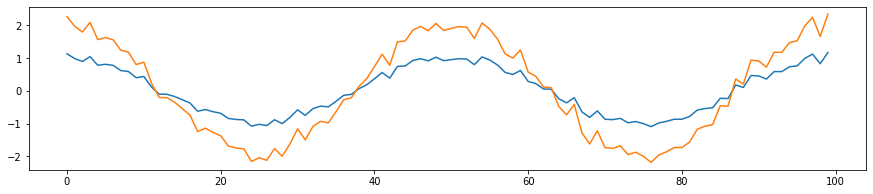

In [77]:
# >>>>>>>>>>>>>>>>> #filter4 <<<<<<<<<<<<<<<<<<<<<<<<<
B = [2, 0, 0, 0]
y = lfilter(B,1,x)
plt.figure(figsize=(15,3))
plt.figure(figsize=(15,3))
plt.plot(x)
plt.plot(y)


<Figure size 1080x216 with 0 Axes>

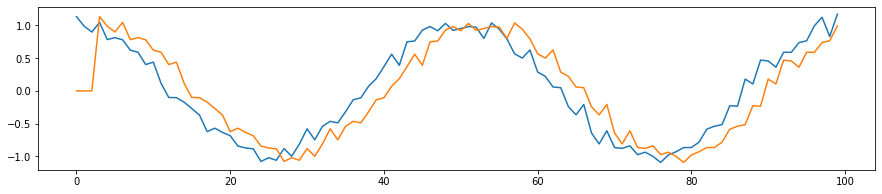

In [79]:
# >>>>>>>>>>>>>>>>> #filter5 <<<<<<<<<<<<<<<<<<<<<<<<<
B = [0, 0, 0, 1]
y = lfilter(B,1,x)
plt.figure(figsize=(15,3))
plt.figure(figsize=(15,3))
plt.plot(x)
plt.plot(y)


In [84]:
# >>>>>>>>>>>>>>>>> #convolution <<<<<<<<<<<<<<<<<<<<<<<<<
x = [4,  4,  4,  4,  0,  0,  0,  0]
h = [0.25,  -0.25,  0.25,  -0.25]
# convolution 
y = np.convolve(x,h)
print(y) 
# demo of commutativity  
y = np.convolve(h,x)
print(y) 
# the same as filtering ... 
y = lfilter(h,1,x)
print(y) 


[ 1.  0.  1.  0. -1.  0. -1.  0.  0.  0.  0.]
[ 1.  0.  1.  0. -1.  0. -1.  0.  0.  0.  0.]
[ 1.  0.  1.  0. -1.  0. -1.  0.]


<StemContainer object of 3 artists>

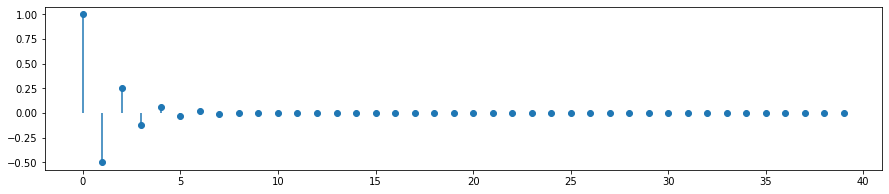

In [98]:
# >>>>>>>>>>>>>>>>> #iir_response <<<<<<<<<<<<<<<<<<<<<<<<<
a1 = 0.5    # <---- set it here, try also negative and greater than 1 !  
x = np.zeros(40)
x[0] = 1
h = lfilter([1,0],[1,a1],x)    # if more a coefficients, length of b must match ... 
plt.figure(figsize=(15,3))
plt.stem(h,basefmt=" ", use_line_collection="true")


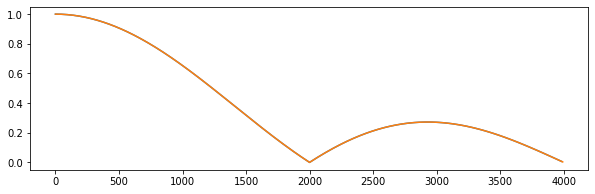

In [108]:
# >>>>>>>>>>>>>>>>> #freq_char_by_ft_of_impulse_response <<<<<<<<<<<<<<<<<<<<<<<<<
# for the smoothing filter with all coeffs 0.25
Fs = 8000
Fs2 = Fs / 2
B = [0.25,0.25,0.25,0.25]     # <----- change also to + - + - 

# pad zeros to compute FFT ... 
Nfft = 512
Blong = np.pad(B, (0, Nfft - 4), 'constant', constant_values=0)
H = np.fft.fft(Blong)
H = H[0:int(Nfft/2)]
freq = np.arange(Nfft/2) / Nfft * Fs
plt.figure(figsize=(10,3))
plt.plot(freq,  np.abs(H))

# check with freqz function ... 
w, H = freqz(B,1)
plt.plot(w / np.pi * Fs2, np.abs(H))
